# Smart Lead Scoring Engine

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, f1_score, confusion_matrix


In [2]:
from sklearn.impute import KNNImputer


In [3]:
train = pd.read_csv("train_wn75k28.csv")
test= pd.read_csv("test_Wf7sxXF.csv")

In [4]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [5]:
train[(train['products_purchased'].isna()) & (train['buy']==0)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
11,12,2021-01-01,7,4,NaN,NaN,1,0,0,0,0,1,0,1,0,0,0,0,0
14,15,2021-01-01,4,7,NaN,2019-05-03,0,0,0,0,0,1,0,0,0,0,1,0,0
15,16,2021-01-01,7,2,NaN,2021-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39150,39151,2021-12-31,11,6,NaN,NaN,0,0,1,0,1,0,0,1,0,0,0,0,0
39152,39153,2021-12-31,10,9,NaN,NaN,0,0,0,0,0,1,0,1,0,0,0,0,0
39153,39154,2021-12-31,15,14,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39155,39156,2021-12-31,4,2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
train[(train['products_purchased'].isna()) & (train['buy']==1)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
173,174,2021-01-05,6,3,NaN,2020-11-13,0,1,0,0,1,0,0,0,0,0,0,0,1
178,179,2021-01-06,8,9,NaN,2018-07-23,1,0,0,1,1,0,0,0,1,0,0,0,1
305,306,2021-01-09,5,7,NaN,2021-05-27,1,0,0,0,0,0,0,0,0,0,0,0,1
326,327,2021-01-10,3,6,NaN,2017-01-10,0,0,0,1,0,1,0,0,0,0,0,0,1
345,346,2021-01-10,5,8,NaN,2020-06-05,1,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38871,38872,2021-12-30,3,6,NaN,2020-11-17,0,0,0,0,1,0,0,0,0,0,1,0,1
38964,38965,2021-12-30,5,6,NaN,2020-03-01,1,0,0,0,1,1,1,1,1,0,0,0,1
39071,39072,2021-12-31,6,6,NaN,2021-01-01,0,0,1,1,1,1,0,0,0,0,1,0,1
39129,39130,2021-12-31,6,6,NaN,2019-05-19,1,0,0,0,0,1,0,0,0,0,1,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
print("signup_date :",train.signup_date.nunique())
print("created_at :",train.created_at.nunique())
print("campaign_var_1 :",train.campaign_var_1.nunique())
print("campaign_var_2 :",train.campaign_var_2.nunique())
print("products_purchased :",train.products_purchased.nunique())

signup_date : 1800
created_at : 365
campaign_var_1 : 16
campaign_var_2 : 15
products_purchased : 4


In [9]:
train['signup_date'].value_counts()

2021-07-18    45
2021-09-20    38
2021-08-03    38
2021-01-28    38
2021-09-10    38
              ..
2015-12-08     1
2015-09-26     1
2017-03-17     1
2015-12-30     1
2018-11-14     1
Name: signup_date, Length: 1800, dtype: int64

In [10]:
train['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

In [11]:
# Check the value counts for the column 

train['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [12]:
# Check the value counts for the column 

train['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [13]:
# Check the value counts for the column 

train['campaign_var_2'].value_counts()

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64

In [14]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [15]:
train[train.duplicated(keep=False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy


In [16]:
test[test.duplicated(keep=False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12


In [17]:
# check for percentage of null values in each column

percent_missing = round(100*(train.isnull().sum()/len(train.index)), 2)
print(percent_missing)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64


In [18]:
# check for percentage of null values in each column

percent_missing_test = round(100*(test.isnull().sum()/len(train.index)), 2)
print(percent_missing_test)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      20.78
signup_date             16.98
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
dtype: float64


In [19]:
#train.signup_date = pd.to_datetime(train.signup_date)
train.created_at = pd.to_datetime(train.created_at)
#difference = (train.created_at-train.signup_date )
train['day_of_week'] = train['created_at'].dt.day_name()
#train['d']=train['day_of_week'].dt.day_of_week
train['day'] = train['created_at'].dt.strftime("%w")
train['quarter'] = pd.to_datetime(train['created_at']).dt.quarter


In [20]:
test.created_at = pd.to_datetime(test.created_at)
test['day_of_week'] = test['created_at'].dt.day_name()
test['day'] = test['created_at'].dt.strftime("%w")
test['quarter'] = pd.to_datetime(test['created_at']).dt.quarter

In [21]:
train.groupby(train.created_at).groups

{Timestamp('2021-01-01 00:00:00'): Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
             19, 20],
            dtype='int64'),
 Timestamp('2021-01-02 00:00:00'): Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
             38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
             55, 56, 57, 58, 59, 60, 61, 62, 63],
            dtype='int64'),
 Timestamp('2021-01-03 00:00:00'): Int64Index([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
              90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
            dtype='int64'),
 Timestamp('2021-01-04 00:00:00'): Int64Index([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
             115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
             128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
            dtype

In [22]:
grouped=train.groupby('created_at')

In [23]:
print(grouped.get_group('2021-01-01')) ,print(grouped.get_group('2021-01-02'))

    id created_at  campaign_var_1  campaign_var_2  products_purchased  \
0    1 2021-01-01               1               2                 2.0   
1    2 2021-01-01               2               1                 2.0   
2    3 2021-01-01               9               3                 3.0   
3    4 2021-01-01               6               7                 2.0   
4    5 2021-01-01               4               6                 NaN   
5    6 2021-01-01               3               4                 3.0   
6    7 2021-01-01               5               1                 1.0   
7    8 2021-01-01               7               3                 NaN   
8    9 2021-01-01              13               6                 3.0   
9   10 2021-01-01               3               6                 2.0   
10  11 2021-01-01               1               1                 1.0   
11  12 2021-01-01               7               4                 NaN   
12  13 2021-01-01               2               6  

(None, None)

In [24]:
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,1,1,0,0,0,0,0,Friday,5,1
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,1,0,0,0,0,0,0,Friday,5,1
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4


In [25]:
train.tail(50)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
39111,39112,2021-12-31,4,4,NaN,NaN,1,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39112,39113,2021-12-31,6,7,3.0,NaN,0,0,0,0,...,1,1,0,0,0,0,0,Friday,5,4
39113,39114,2021-12-31,4,4,NaN,NaN,0,0,1,0,...,0,0,0,0,0,0,0,Friday,5,4
39114,39115,2021-12-31,5,5,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39115,39116,2021-12-31,1,1,3.0,2021-07-10,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,4
39116,39117,2021-12-31,6,7,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39117,39118,2021-12-31,16,13,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39118,39119,2021-12-31,6,8,2.0,2021-06-04,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39119,39120,2021-12-31,15,12,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39120,39121,2021-12-31,8,8,2.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4


In [26]:

train['user_activity_var_3'].value_counts()

0    35134
1     4027
Name: user_activity_var_3, dtype: int64

In [27]:
train['user_activity_var_2'].value_counts()

0    38898
1      263
Name: user_activity_var_2, dtype: int64

In [28]:
train['user_activity_var_4'].value_counts()

0    38712
1      449
Name: user_activity_var_4, dtype: int64

In [29]:
train['user_activity_var_10'].value_counts()

0    39146
1       15
Name: user_activity_var_10, dtype: int64

In [30]:
train['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [31]:
train['day'].value_counts()

1    5672
0    5630
4    5596
3    5580
5    5572
6    5570
2    5541
Name: day, dtype: int64

In [32]:
train['quarter'].value_counts()

4    14233
3    11794
2     8372
1     4762
Name: quarter, dtype: int64

In [33]:
train[train['day_of_week'].isna() | train['products_purchased'].isna()]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,1
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,1
11,12,2021-01-01,7,4,NaN,NaN,1,0,0,0,...,0,1,0,0,0,0,0,Friday,5,1
14,15,2021-01-01,4,7,NaN,2019-05-03,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,1
15,16,2021-01-01,7,2,NaN,2021-03-09,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39150,39151,2021-12-31,11,6,NaN,NaN,0,0,1,0,...,0,1,0,0,0,0,0,Friday,5,4
39152,39153,2021-12-31,10,9,NaN,NaN,0,0,0,0,...,0,1,0,0,0,0,0,Friday,5,4
39153,39154,2021-12-31,15,14,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39155,39156,2021-12-31,4,2,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4


In [34]:
train_df = train.drop(['signup_date', 'day_of_week', 'created_at','id'], axis=1)

In [35]:
test_df = test.drop(['signup_date', 'day_of_week', 'created_at','id'], axis=1)

In [36]:
train_df

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
4,4,6,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0,5,4
39157,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4
39158,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0,5,4
39159,7,12,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,4


In [37]:
#train_df['products_purchased'] = train_df['products_purchased'].fillna(0)
train_df['products_purchased'] = train_df['products_purchased'].fillna(train_df['products_purchased'].mode()[0])


In [38]:
#test_df['products_purchased'] = test_df['products_purchased'].fillna(0)
test_df['products_purchased'] = test_df['products_purchased'].fillna(test_df['products_purchased'].mode()[0])


In [39]:
train_df.head(4)

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1


In [40]:
train_df['day']= train_df['day'].astype('int64')
train_df['products_purchased']= train_df['products_purchased'].astype('int64')

In [41]:
test_df['day']= test_df['day'].astype('int64')
test_df['products_purchased']= test_df['products_purchased'].astype('int64')

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        39161 non-null  int64
 1   campaign_var_2        39161 non-null  int64
 2   products_purchased    39161 non-null  int64
 3   user_activity_var_1   39161 non-null  int64
 4   user_activity_var_2   39161 non-null  int64
 5   user_activity_var_3   39161 non-null  int64
 6   user_activity_var_4   39161 non-null  int64
 7   user_activity_var_5   39161 non-null  int64
 8   user_activity_var_6   39161 non-null  int64
 9   user_activity_var_7   39161 non-null  int64
 10  user_activity_var_8   39161 non-null  int64
 11  user_activity_var_9   39161 non-null  int64
 12  user_activity_var_10  39161 non-null  int64
 13  user_activity_var_11  39161 non-null  int64
 14  user_activity_var_12  39161 non-null  int64
 15  buy                   39161 non-null  int64
 16  day 

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        13184 non-null  int64
 1   campaign_var_2        13184 non-null  int64
 2   products_purchased    13184 non-null  int64
 3   user_activity_var_1   13184 non-null  int64
 4   user_activity_var_2   13184 non-null  int64
 5   user_activity_var_3   13184 non-null  int64
 6   user_activity_var_4   13184 non-null  int64
 7   user_activity_var_5   13184 non-null  int64
 8   user_activity_var_6   13184 non-null  int64
 9   user_activity_var_7   13184 non-null  int64
 10  user_activity_var_8   13184 non-null  int64
 11  user_activity_var_9   13184 non-null  int64
 12  user_activity_var_10  13184 non-null  int64
 13  user_activity_var_11  13184 non-null  int64
 14  user_activity_var_12  13184 non-null  int64
 15  day                   13184 non-null  int64
 16  quar

In [44]:
test_df.head(4)

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,day,quarter
0,2,2,2,1,1,0,0,0,1,0,0,0,0,1,0,6,1
1,4,7,3,1,0,0,0,0,0,0,1,0,0,0,0,6,1
2,8,7,2,0,0,0,0,1,1,0,0,0,0,0,0,6,1
3,9,8,2,0,0,0,0,1,1,1,0,0,0,2,0,6,1


In [45]:
train_df.head(4)

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1


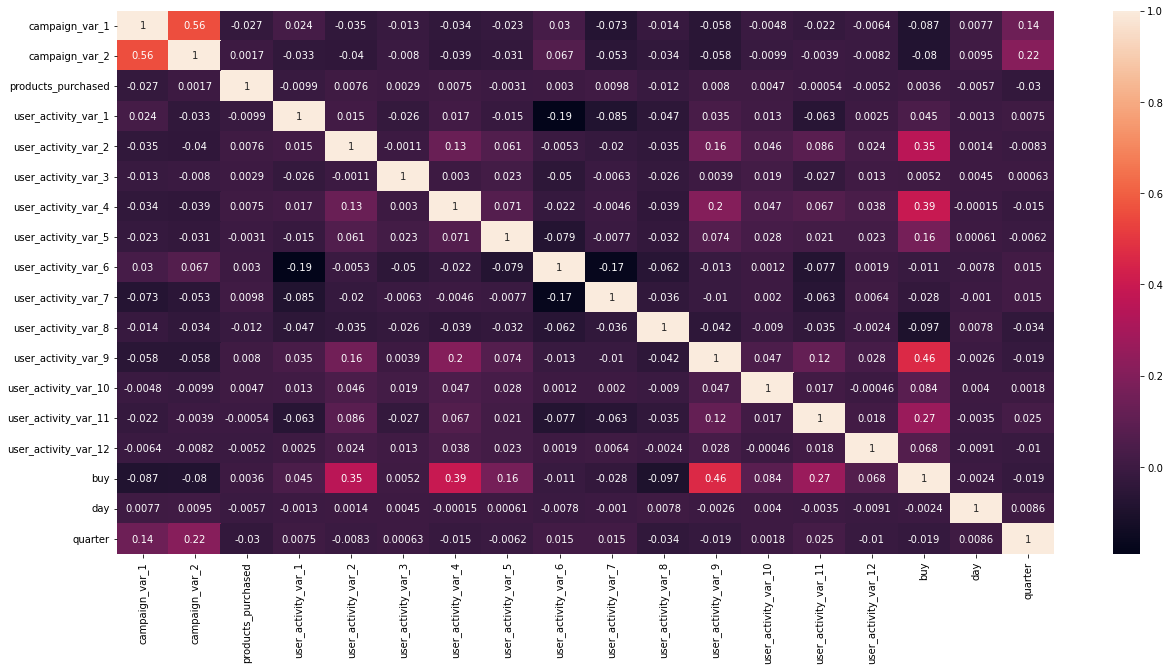

In [46]:
plt.figure(figsize = (21,10))
sns.heatmap(train_df.corr(), annot=True)

In [47]:
# train test split

X = train_df.loc[:,train_df.columns != 'buy']
y = train_df.buy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [48]:
print('X_train & y_train shape: ',X_train.shape,y_train.shape)
print('X_test & y_test shape: ',X_test.shape,y_test.shape)

X_train & y_train shape:  (31328, 17) (31328,)
X_test & y_test shape:  (7833, 17) (7833,)


In [49]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
scaled_data_test = scaler.fit_transform(test_df)

In [51]:
X_train

array([[-0.7247352 , -0.17215835,  3.58848392, ..., -0.02463441,
         0.50670881,  0.0951742 ],
       [ 1.5766108 ,  0.97325653, -0.13347884, ..., -0.02463441,
        -0.98991346,  0.0951742 ],
       [ 0.71360605, -0.55396331,  1.72750254, ..., -0.02463441,
        -0.49103937,  1.06860458],
       ...,
       [-0.7247352 ,  0.59145157,  1.72750254, ..., -0.02463441,
        -0.49103937,  0.0951742 ],
       [ 0.71360605,  0.97325653, -0.13347884, ..., -0.02463441,
        -0.98991346,  1.06860458],
       [-1.3000717 , -1.31757323, -0.13347884, ..., -0.02463441,
         0.50670881, -0.87825619]])

In [52]:
X_test

array([[-0.43706695,  0.20964661, -0.13347884, ..., -0.02463441,
        -0.49103937,  1.06860458],
       [-1.58773995, -1.31757323, -0.13347884, ..., -0.02463441,
         0.50670881,  0.0951742 ],
       [-1.3000717 , -2.08118315, -0.13347884, ..., -0.02463441,
         1.00558289,  0.0951742 ],
       ...,
       [ 2.43961555,  1.73686644, -0.13347884, ..., -0.02463441,
         1.50445698,  1.06860458],
       [-0.7247352 , -0.55396331,  1.72750254, ..., -0.02463441,
        -0.49103937, -0.87825619],
       [ 1.0012743 , -1.69937819, -0.13347884, ..., -0.02463441,
         0.00783472,  0.0951742 ]])

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Logistic Regression 

In [54]:
# create object for Logistic Regression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

# predict on X_train and X_test

y_pred_test = lgr.predict(X_test)

# classification report

print('Classification Report for Logistic Regresion\n\n', classification_report(y_test,y_pred_test))

# F1 Score

lgr_f1 = f1_score(y_test, y_pred_test)*100
print('F1 Score is :', lgr_f1)

Classification Report for Logistic Regresion

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.95      0.51      0.67       400

    accuracy                           0.97      7833
   macro avg       0.96      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 66.66666666666666


## Random Forest Classifier 

In [55]:
# create object for Random Forest Classifier

rf_clf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_test2 = rf_clf.predict(X_test)

# Classification Report

print('Classification Report for Random Forest\n\n', classification_report(y_test, y_pred_test2))

# F1 score

rf_clf_f1 = f1_score(y_test, y_pred_test2)*100
print('F1 score is :', rf_clf_f1)

Classification Report for Random Forest

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7433
           1       0.83      0.55      0.66       400

    accuracy                           0.97      7833
   macro avg       0.90      0.77      0.82      7833
weighted avg       0.97      0.97      0.97      7833

F1 score is : 66.26506024096386


## KNN Classifier

In [56]:
# create object of KNN Classifier

knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='manhattan', n_jobs=-1)
knn_clf.fit(X_train, y_train)

y_pred_test3 = knn_clf.predict(X_test)

# Classification Report

print('Classification Report for KNN\n\n', classification_report(y_test, y_pred_test3))

# F1 Score

knn_clf_f1 = f1_score(y_test, y_pred_test3)*100
print('F1 Score is :', knn_clf_f1)

Classification Report for KNN

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.86      0.53      0.65       400

    accuracy                           0.97      7833
   macro avg       0.92      0.76      0.82      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 65.31881804043547


## GaussianNB Classifier

In [57]:
# create object of Naive Bayes Classifier

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred_test4 = gnb_clf.predict(X_test)

# Classification Report

print('Classification Report for Naive Bayes\n\n', classification_report(y_test, y_pred_test4))

# F1 Score

gnb_clf_f1 = f1_score(y_test, y_pred_test4)*100
print('F1 Score is :', gnb_clf_f1)

Classification Report for Naive Bayes

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7433
           1       0.92      0.47      0.62       400

    accuracy                           0.97      7833
   macro avg       0.94      0.74      0.80      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 62.37623762376238


## XGBoost Clasifier 

In [58]:
# create object of XGBoost Clasifier

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.1, max_depth=3, n_estimators=200,
                        n_jobs=-1, objective='binary:logistic', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_test6 = xgb_clf.predict(X_test)

# Classification Report

print('Classification Report for XGBoost\n\n', classification_report(y_test, y_pred_test6))

# F1 Score

xgb_clf_f1 = f1_score(y_test, y_pred_test6)*100
print('F1 Score is :', xgb_clf_f1)

[15:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adamya\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report for XGBoost

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.93      0.56      0.70       400

    accuracy                           0.98      7833
   macro avg       0.95      0.78      0.84      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 69.59247648902821


## SVC

In [59]:
# create object of SVC

svc_clf = SVC(decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', random_state=42)
svc_clf.fit(X_train, y_train)

y_pred_test8 = svc_clf.predict(X_test)

# Classification Report

print('Classification Report for SVM\n\n', classification_report(y_test, y_pred_test8))

# F1 Score

svc_clf_f1 = f1_score(y_test, y_pred_test8)*100
print('F1 Score is :', svc_clf_f1)

Classification Report for SVM

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.93      0.56      0.69       400

    accuracy                           0.98      7833
   macro avg       0.95      0.78      0.84      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 69.48356807511738


In [60]:
from catboost import CatBoostClassifier
catboostClf = CatBoostClassifier(eval_metric='F1', iterations=5000)
catboostClf.fit(X_train, y_train)
preds = catboostClf.predict(X_test)


Learning rate set to 0.01025
0:	learn: 0.6757734	total: 147ms	remaining: 12m 13s
1:	learn: 0.5853227	total: 152ms	remaining: 6m 20s
2:	learn: 0.5979921	total: 160ms	remaining: 4m 26s
3:	learn: 0.6677538	total: 166ms	remaining: 3m 27s
4:	learn: 0.6758175	total: 172ms	remaining: 2m 51s
5:	learn: 0.6755233	total: 180ms	remaining: 2m 29s
6:	learn: 0.6760450	total: 186ms	remaining: 2m 12s
7:	learn: 0.6757734	total: 193ms	remaining: 2m
8:	learn: 0.6757734	total: 199ms	remaining: 1m 50s
9:	learn: 0.6757734	total: 206ms	remaining: 1m 42s
10:	learn: 0.6757734	total: 212ms	remaining: 1m 36s
11:	learn: 0.6757734	total: 220ms	remaining: 1m 31s
12:	learn: 0.6757734	total: 226ms	remaining: 1m 26s
13:	learn: 0.6757734	total: 231ms	remaining: 1m 22s
14:	learn: 0.6757734	total: 239ms	remaining: 1m 19s
15:	learn: 0.6757734	total: 247ms	remaining: 1m 17s
16:	learn: 0.6757734	total: 257ms	remaining: 1m 15s
17:	learn: 0.6757734	total: 266ms	remaining: 1m 13s
18:	learn: 0.6757734	total: 274ms	remaining: 1m 

181:	learn: 0.6800967	total: 1.4s	remaining: 36.9s
182:	learn: 0.6800967	total: 1.4s	remaining: 36.9s
183:	learn: 0.6800967	total: 1.41s	remaining: 36.9s
184:	learn: 0.6803708	total: 1.42s	remaining: 36.8s
185:	learn: 0.6803708	total: 1.42s	remaining: 36.8s
186:	learn: 0.6803708	total: 1.43s	remaining: 36.8s
187:	learn: 0.6803708	total: 1.44s	remaining: 36.7s
188:	learn: 0.6803708	total: 1.44s	remaining: 36.7s
189:	learn: 0.6803708	total: 1.45s	remaining: 36.7s
190:	learn: 0.6803708	total: 1.46s	remaining: 36.6s
191:	learn: 0.6803708	total: 1.46s	remaining: 36.6s
192:	learn: 0.6803708	total: 1.47s	remaining: 36.6s
193:	learn: 0.6803708	total: 1.48s	remaining: 36.6s
194:	learn: 0.6803708	total: 1.48s	remaining: 36.5s
195:	learn: 0.6803708	total: 1.49s	remaining: 36.5s
196:	learn: 0.6803708	total: 1.5s	remaining: 36.5s
197:	learn: 0.6803708	total: 1.5s	remaining: 36.5s
198:	learn: 0.6803708	total: 1.51s	remaining: 36.5s
199:	learn: 0.6809025	total: 1.52s	remaining: 36.4s
200:	learn: 0.68

340:	learn: 0.6870229	total: 2.44s	remaining: 33.4s
341:	learn: 0.6870229	total: 2.45s	remaining: 33.3s
342:	learn: 0.6870229	total: 2.45s	remaining: 33.3s
343:	learn: 0.6870229	total: 2.46s	remaining: 33.3s
344:	learn: 0.6870229	total: 2.47s	remaining: 33.3s
345:	learn: 0.6872990	total: 2.47s	remaining: 33.3s
346:	learn: 0.6872990	total: 2.48s	remaining: 33.3s
347:	learn: 0.6872990	total: 2.49s	remaining: 33.2s
348:	learn: 0.6872990	total: 2.49s	remaining: 33.2s
349:	learn: 0.6870229	total: 2.5s	remaining: 33.2s
350:	learn: 0.6870229	total: 2.5s	remaining: 33.2s
351:	learn: 0.6870229	total: 2.51s	remaining: 33.1s
352:	learn: 0.6870229	total: 2.52s	remaining: 33.1s
353:	learn: 0.6870229	total: 2.52s	remaining: 33.1s
354:	learn: 0.6870229	total: 2.53s	remaining: 33.1s
355:	learn: 0.6872990	total: 2.53s	remaining: 33.1s
356:	learn: 0.6870229	total: 2.54s	remaining: 33s
357:	learn: 0.6875754	total: 2.55s	remaining: 33s
358:	learn: 0.6875754	total: 2.55s	remaining: 33s
359:	learn: 0.687575

505:	learn: 0.6928944	total: 3.49s	remaining: 31s
506:	learn: 0.6928944	total: 3.5s	remaining: 31s
507:	learn: 0.6928944	total: 3.51s	remaining: 31s
508:	learn: 0.6928944	total: 3.52s	remaining: 31s
509:	learn: 0.6928944	total: 3.52s	remaining: 31s
510:	learn: 0.6928944	total: 3.53s	remaining: 31s
511:	learn: 0.6928944	total: 3.54s	remaining: 31s
512:	learn: 0.6928944	total: 3.54s	remaining: 31s
513:	learn: 0.6928944	total: 3.55s	remaining: 31s
514:	learn: 0.6928944	total: 3.56s	remaining: 31s
515:	learn: 0.6928944	total: 3.56s	remaining: 31s
516:	learn: 0.6928944	total: 3.57s	remaining: 31s
517:	learn: 0.6928944	total: 3.58s	remaining: 31s
518:	learn: 0.6928944	total: 3.58s	remaining: 31s
519:	learn: 0.6928944	total: 3.59s	remaining: 30.9s
520:	learn: 0.6928944	total: 3.6s	remaining: 30.9s
521:	learn: 0.6928944	total: 3.6s	remaining: 30.9s
522:	learn: 0.6928944	total: 3.61s	remaining: 30.9s
523:	learn: 0.6928944	total: 3.62s	remaining: 30.9s
524:	learn: 0.6928944	total: 3.63s	remainin

670:	learn: 0.6979167	total: 4.54s	remaining: 29.3s
671:	learn: 0.6979167	total: 4.54s	remaining: 29.3s
672:	learn: 0.6979167	total: 4.55s	remaining: 29.3s
673:	learn: 0.6979167	total: 4.56s	remaining: 29.3s
674:	learn: 0.6979167	total: 4.56s	remaining: 29.2s
675:	learn: 0.6979167	total: 4.57s	remaining: 29.2s
676:	learn: 0.6979167	total: 4.58s	remaining: 29.2s
677:	learn: 0.6979167	total: 4.58s	remaining: 29.2s
678:	learn: 0.6979167	total: 4.59s	remaining: 29.2s
679:	learn: 0.6979167	total: 4.6s	remaining: 29.2s
680:	learn: 0.6979167	total: 4.6s	remaining: 29.2s
681:	learn: 0.6979167	total: 4.61s	remaining: 29.2s
682:	learn: 0.6979167	total: 4.62s	remaining: 29.2s
683:	learn: 0.6979167	total: 4.62s	remaining: 29.2s
684:	learn: 0.6979167	total: 4.63s	remaining: 29.2s
685:	learn: 0.6979167	total: 4.64s	remaining: 29.2s
686:	learn: 0.6979167	total: 4.64s	remaining: 29.2s
687:	learn: 0.6979167	total: 4.65s	remaining: 29.1s
688:	learn: 0.6979167	total: 4.66s	remaining: 29.1s
689:	learn: 0.

845:	learn: 0.7005198	total: 5.76s	remaining: 28.3s
846:	learn: 0.7005198	total: 5.77s	remaining: 28.3s
847:	learn: 0.7005198	total: 5.77s	remaining: 28.3s
848:	learn: 0.7005198	total: 5.78s	remaining: 28.3s
849:	learn: 0.7005198	total: 5.79s	remaining: 28.2s
850:	learn: 0.7010392	total: 5.79s	remaining: 28.2s
851:	learn: 0.7015581	total: 5.8s	remaining: 28.2s
852:	learn: 0.7015581	total: 5.8s	remaining: 28.2s
853:	learn: 0.7015581	total: 5.81s	remaining: 28.2s
854:	learn: 0.7015581	total: 5.82s	remaining: 28.2s
855:	learn: 0.7015581	total: 5.82s	remaining: 28.2s
856:	learn: 0.7015581	total: 5.83s	remaining: 28.2s
857:	learn: 0.7015581	total: 5.84s	remaining: 28.2s
858:	learn: 0.7015581	total: 5.84s	remaining: 28.2s
859:	learn: 0.7015581	total: 5.85s	remaining: 28.2s
860:	learn: 0.7015581	total: 5.85s	remaining: 28.1s
861:	learn: 0.7015581	total: 5.86s	remaining: 28.1s
862:	learn: 0.7015581	total: 5.87s	remaining: 28.1s
863:	learn: 0.7015581	total: 5.87s	remaining: 28.1s
864:	learn: 0.

1018:	learn: 0.7047087	total: 6.98s	remaining: 27.3s
1019:	learn: 0.7047087	total: 6.99s	remaining: 27.3s
1020:	learn: 0.7047087	total: 7s	remaining: 27.3s
1021:	learn: 0.7047087	total: 7s	remaining: 27.3s
1022:	learn: 0.7047087	total: 7.01s	remaining: 27.2s
1023:	learn: 0.7047087	total: 7.01s	remaining: 27.2s
1024:	learn: 0.7047087	total: 7.02s	remaining: 27.2s
1025:	learn: 0.7047087	total: 7.03s	remaining: 27.2s
1026:	learn: 0.7047087	total: 7.03s	remaining: 27.2s
1027:	learn: 0.7047087	total: 7.04s	remaining: 27.2s
1028:	learn: 0.7047087	total: 7.04s	remaining: 27.2s
1029:	learn: 0.7047087	total: 7.05s	remaining: 27.2s
1030:	learn: 0.7047087	total: 7.06s	remaining: 27.2s
1031:	learn: 0.7047087	total: 7.06s	remaining: 27.2s
1032:	learn: 0.7047087	total: 7.07s	remaining: 27.2s
1033:	learn: 0.7052254	total: 7.08s	remaining: 27.1s
1034:	learn: 0.7055068	total: 7.08s	remaining: 27.1s
1035:	learn: 0.7055068	total: 7.09s	remaining: 27.1s
1036:	learn: 0.7055068	total: 7.09s	remaining: 27.1s

1177:	learn: 0.7073852	total: 8.03s	remaining: 26.1s
1178:	learn: 0.7073852	total: 8.04s	remaining: 26.1s
1179:	learn: 0.7073852	total: 8.05s	remaining: 26.1s
1180:	learn: 0.7073852	total: 8.05s	remaining: 26s
1181:	learn: 0.7073852	total: 8.06s	remaining: 26s
1182:	learn: 0.7073852	total: 8.07s	remaining: 26s
1183:	learn: 0.7073852	total: 8.07s	remaining: 26s
1184:	learn: 0.7073852	total: 8.08s	remaining: 26s
1185:	learn: 0.7073852	total: 8.09s	remaining: 26s
1186:	learn: 0.7076677	total: 8.09s	remaining: 26s
1187:	learn: 0.7076677	total: 8.1s	remaining: 26s
1188:	learn: 0.7076677	total: 8.1s	remaining: 26s
1189:	learn: 0.7076677	total: 8.11s	remaining: 26s
1190:	learn: 0.7076677	total: 8.12s	remaining: 26s
1191:	learn: 0.7076677	total: 8.12s	remaining: 25.9s
1192:	learn: 0.7076677	total: 8.13s	remaining: 25.9s
1193:	learn: 0.7076677	total: 8.13s	remaining: 25.9s
1194:	learn: 0.7076677	total: 8.14s	remaining: 25.9s
1195:	learn: 0.7076677	total: 8.15s	remaining: 25.9s
1196:	learn: 0.70

1346:	learn: 0.7094972	total: 9.25s	remaining: 25.1s
1347:	learn: 0.7094972	total: 9.26s	remaining: 25.1s
1348:	learn: 0.7100120	total: 9.27s	remaining: 25.1s
1349:	learn: 0.7100120	total: 9.28s	remaining: 25.1s
1350:	learn: 0.7100120	total: 9.29s	remaining: 25.1s
1351:	learn: 0.7100120	total: 9.29s	remaining: 25.1s
1352:	learn: 0.7100120	total: 9.3s	remaining: 25.1s
1353:	learn: 0.7100120	total: 9.31s	remaining: 25.1s
1354:	learn: 0.7100120	total: 9.31s	remaining: 25.1s
1355:	learn: 0.7100120	total: 9.32s	remaining: 25.1s
1356:	learn: 0.7100120	total: 9.33s	remaining: 25s
1357:	learn: 0.7100120	total: 9.34s	remaining: 25s
1358:	learn: 0.7100120	total: 9.34s	remaining: 25s
1359:	learn: 0.7100120	total: 9.35s	remaining: 25s
1360:	learn: 0.7100120	total: 9.36s	remaining: 25s
1361:	learn: 0.7100120	total: 9.37s	remaining: 25s
1362:	learn: 0.7100120	total: 9.37s	remaining: 25s
1363:	learn: 0.7100120	total: 9.38s	remaining: 25s
1364:	learn: 0.7100120	total: 9.39s	remaining: 25s
1365:	learn:

1523:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1524:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1525:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1526:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1527:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1528:	learn: 0.7121212	total: 10.5s	remaining: 23.9s
1529:	learn: 0.7121212	total: 10.5s	remaining: 23.8s
1530:	learn: 0.7121212	total: 10.5s	remaining: 23.8s
1531:	learn: 0.7121212	total: 10.5s	remaining: 23.8s
1532:	learn: 0.7121212	total: 10.5s	remaining: 23.8s
1533:	learn: 0.7121212	total: 10.5s	remaining: 23.8s
1534:	learn: 0.7126345	total: 10.5s	remaining: 23.8s
1535:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1536:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1537:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1538:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1539:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1540:	learn: 0.7126345	total: 10.6s	remaining: 23.8s
1541:	learn: 0.7126345	total: 10.6s	remaining:

1689:	learn: 0.7138878	total: 11.5s	remaining: 22.6s
1690:	learn: 0.7138878	total: 11.5s	remaining: 22.6s
1691:	learn: 0.7138878	total: 11.5s	remaining: 22.5s
1692:	learn: 0.7138878	total: 11.5s	remaining: 22.5s
1693:	learn: 0.7138878	total: 11.5s	remaining: 22.5s
1694:	learn: 0.7141720	total: 11.6s	remaining: 22.5s
1695:	learn: 0.7141720	total: 11.6s	remaining: 22.5s
1696:	learn: 0.7141720	total: 11.6s	remaining: 22.5s
1697:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1698:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1699:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1700:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1701:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1702:	learn: 0.7136599	total: 11.6s	remaining: 22.5s
1703:	learn: 0.7136599	total: 11.6s	remaining: 22.4s
1704:	learn: 0.7141720	total: 11.6s	remaining: 22.4s
1705:	learn: 0.7136599	total: 11.6s	remaining: 22.4s
1706:	learn: 0.7141720	total: 11.6s	remaining: 22.4s
1707:	learn: 0.7141720	total: 11.6s	remaining:

1860:	learn: 0.7138878	total: 12.7s	remaining: 21.5s
1861:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1862:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1863:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1864:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1865:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1866:	learn: 0.7138878	total: 12.8s	remaining: 21.5s
1867:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1868:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1869:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1870:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1871:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1872:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1873:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1874:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1875:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1876:	learn: 0.7138878	total: 12.8s	remaining: 21.4s
1877:	learn: 0.7138878	total: 12.9s	remaining: 21.4s
1878:	learn: 0.7138878	total: 12.9s	remaining:

2032:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2033:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2034:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2035:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2036:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2037:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2038:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2039:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2040:	learn: 0.7149105	total: 13.8s	remaining: 20.1s
2041:	learn: 0.7154213	total: 13.8s	remaining: 20.1s
2042:	learn: 0.7154213	total: 13.8s	remaining: 20s
2043:	learn: 0.7154213	total: 13.9s	remaining: 20s
2044:	learn: 0.7154213	total: 13.9s	remaining: 20s
2045:	learn: 0.7154213	total: 13.9s	remaining: 20s
2046:	learn: 0.7154213	total: 13.9s	remaining: 20s
2047:	learn: 0.7154213	total: 13.9s	remaining: 20s
2048:	learn: 0.7154213	total: 13.9s	remaining: 20s
2049:	learn: 0.7154213	total: 13.9s	remaining: 20s
2050:	learn: 0.7154213	total: 13.9s	remaining: 20s
2051:	learn

2193:	learn: 0.7164416	total: 14.8s	remaining: 19s
2194:	learn: 0.7164416	total: 14.8s	remaining: 19s
2195:	learn: 0.7164416	total: 14.8s	remaining: 19s
2196:	learn: 0.7164416	total: 14.9s	remaining: 19s
2197:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2198:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2199:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2200:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2201:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2202:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2203:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2204:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2205:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2206:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2207:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2208:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2209:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2210:	learn: 0.7164416	total: 14.9s	remaining: 18.9s
2211:	learn: 0.7164416	total: 15s	remaining: 18.8s
221

2369:	learn: 0.7202853	total: 16s	remaining: 17.8s
2370:	learn: 0.7202853	total: 16s	remaining: 17.8s
2371:	learn: 0.7200000	total: 16s	remaining: 17.8s
2372:	learn: 0.7200000	total: 16s	remaining: 17.8s
2373:	learn: 0.7202853	total: 16s	remaining: 17.8s
2374:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2375:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2376:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2377:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2378:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2379:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2380:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2381:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2382:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2383:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2384:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2385:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2386:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
2387:	learn: 0.7202853	total: 16.1s	remaining: 17.7s
238

2527:	learn: 0.7220903	total: 17.1s	remaining: 16.7s
2528:	learn: 0.7220903	total: 17.1s	remaining: 16.7s
2529:	learn: 0.7220903	total: 17.1s	remaining: 16.7s
2530:	learn: 0.7220903	total: 17.1s	remaining: 16.7s
2531:	learn: 0.7220903	total: 17.1s	remaining: 16.7s
2532:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2533:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2534:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2535:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2536:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2537:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2538:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2539:	learn: 0.7223762	total: 17.1s	remaining: 16.6s
2540:	learn: 0.7220903	total: 17.1s	remaining: 16.6s
2541:	learn: 0.7220903	total: 17.2s	remaining: 16.6s
2542:	learn: 0.7220903	total: 17.2s	remaining: 16.6s
2543:	learn: 0.7223762	total: 17.2s	remaining: 16.6s
2544:	learn: 0.7223762	total: 17.2s	remaining: 16.6s
2545:	learn: 0.7223762	total: 17.2s	remaining:

2696:	learn: 0.7238924	total: 18.1s	remaining: 15.5s
2697:	learn: 0.7243970	total: 18.1s	remaining: 15.5s
2698:	learn: 0.7238924	total: 18.1s	remaining: 15.4s
2699:	learn: 0.7238924	total: 18.1s	remaining: 15.4s
2700:	learn: 0.7238924	total: 18.1s	remaining: 15.4s
2701:	learn: 0.7243970	total: 18.1s	remaining: 15.4s
2702:	learn: 0.7249012	total: 18.1s	remaining: 15.4s
2703:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2704:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2705:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2706:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2707:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2708:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2709:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2710:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2711:	learn: 0.7249012	total: 18.2s	remaining: 15.4s
2712:	learn: 0.7249012	total: 18.2s	remaining: 15.3s
2713:	learn: 0.7249012	total: 18.2s	remaining: 15.3s
2714:	learn: 0.7249012	total: 18.2s	remaining:

2862:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2863:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2864:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2865:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2866:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2867:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2868:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2869:	learn: 0.7269140	total: 19.2s	remaining: 14.3s
2870:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2871:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2872:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2873:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2874:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2875:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2876:	learn: 0.7269140	total: 19.2s	remaining: 14.2s
2877:	learn: 0.7269140	total: 19.3s	remaining: 14.2s
2878:	learn: 0.7269140	total: 19.3s	remaining: 14.2s
2879:	learn: 0.7269140	total: 19.3s	remaining: 14.2s
2880:	learn: 0.7269140	total: 19.3s	remaining:

3032:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3033:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3034:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3035:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3036:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3037:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3038:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3039:	learn: 0.7297084	total: 20.2s	remaining: 13.1s
3040:	learn: 0.7297084	total: 20.3s	remaining: 13s
3041:	learn: 0.7297084	total: 20.3s	remaining: 13s
3042:	learn: 0.7297084	total: 20.3s	remaining: 13s
3043:	learn: 0.7297084	total: 20.3s	remaining: 13s
3044:	learn: 0.7297084	total: 20.3s	remaining: 13s
3045:	learn: 0.7297084	total: 20.3s	remaining: 13s
3046:	learn: 0.7297084	total: 20.3s	remaining: 13s
3047:	learn: 0.7297084	total: 20.3s	remaining: 13s
3048:	learn: 0.7297084	total: 20.3s	remaining: 13s
3049:	learn: 0.7297084	total: 20.3s	remaining: 13s
3050:	learn: 0.7297084	total: 20.3s	remaining: 13s
3051:	learn: 0.

3212:	learn: 0.7317842	total: 21.4s	remaining: 11.9s
3213:	learn: 0.7317842	total: 21.4s	remaining: 11.9s
3214:	learn: 0.7317842	total: 21.4s	remaining: 11.9s
3215:	learn: 0.7317842	total: 21.4s	remaining: 11.9s
3216:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3217:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3218:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3219:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3220:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3221:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3222:	learn: 0.7317842	total: 21.5s	remaining: 11.9s
3223:	learn: 0.7317842	total: 21.5s	remaining: 11.8s
3224:	learn: 0.7317842	total: 21.5s	remaining: 11.8s
3225:	learn: 0.7317842	total: 21.5s	remaining: 11.8s
3226:	learn: 0.7325719	total: 21.5s	remaining: 11.8s
3227:	learn: 0.7325719	total: 21.5s	remaining: 11.8s
3228:	learn: 0.7325719	total: 21.5s	remaining: 11.8s
3229:	learn: 0.7325719	total: 21.5s	remaining: 11.8s
3230:	learn: 0.7325719	total: 21.6s	remaining:

3387:	learn: 0.7348544	total: 22.6s	remaining: 10.8s
3388:	learn: 0.7348544	total: 22.7s	remaining: 10.8s
3389:	learn: 0.7348544	total: 22.7s	remaining: 10.8s
3390:	learn: 0.7348544	total: 22.7s	remaining: 10.8s
3391:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3392:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3393:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3394:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3395:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3396:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3397:	learn: 0.7348544	total: 22.7s	remaining: 10.7s
3398:	learn: 0.7350629	total: 22.7s	remaining: 10.7s
3399:	learn: 0.7350629	total: 22.7s	remaining: 10.7s
3400:	learn: 0.7350629	total: 22.7s	remaining: 10.7s
3401:	learn: 0.7350629	total: 22.7s	remaining: 10.7s
3402:	learn: 0.7350629	total: 22.8s	remaining: 10.7s
3403:	learn: 0.7350629	total: 22.8s	remaining: 10.7s
3404:	learn: 0.7350629	total: 22.8s	remaining: 10.7s
3405:	learn: 0.7350629	total: 22.8s	remaining:

3551:	learn: 0.7362637	total: 23.7s	remaining: 9.66s
3552:	learn: 0.7362637	total: 23.7s	remaining: 9.65s
3553:	learn: 0.7362637	total: 23.7s	remaining: 9.64s
3554:	learn: 0.7362637	total: 23.7s	remaining: 9.64s
3555:	learn: 0.7362637	total: 23.7s	remaining: 9.63s
3556:	learn: 0.7362637	total: 23.7s	remaining: 9.62s
3557:	learn: 0.7362637	total: 23.7s	remaining: 9.62s
3558:	learn: 0.7362637	total: 23.7s	remaining: 9.61s
3559:	learn: 0.7362637	total: 23.7s	remaining: 9.6s
3560:	learn: 0.7362637	total: 23.7s	remaining: 9.6s
3561:	learn: 0.7362637	total: 23.8s	remaining: 9.59s
3562:	learn: 0.7362637	total: 23.8s	remaining: 9.58s
3563:	learn: 0.7362637	total: 23.8s	remaining: 9.57s
3564:	learn: 0.7362637	total: 23.8s	remaining: 9.57s
3565:	learn: 0.7362637	total: 23.8s	remaining: 9.56s
3566:	learn: 0.7367595	total: 23.8s	remaining: 9.55s
3567:	learn: 0.7367595	total: 23.8s	remaining: 9.54s
3568:	learn: 0.7367595	total: 23.8s	remaining: 9.54s
3569:	learn: 0.7367595	total: 23.8s	remaining: 9

3722:	learn: 0.7387387	total: 24.7s	remaining: 8.48s
3723:	learn: 0.7387387	total: 24.7s	remaining: 8.48s
3724:	learn: 0.7387387	total: 24.7s	remaining: 8.47s
3725:	learn: 0.7387387	total: 24.8s	remaining: 8.46s
3726:	learn: 0.7387387	total: 24.8s	remaining: 8.46s
3727:	learn: 0.7387387	total: 24.8s	remaining: 8.45s
3728:	learn: 0.7392326	total: 24.8s	remaining: 8.44s
3729:	learn: 0.7392326	total: 24.8s	remaining: 8.44s
3730:	learn: 0.7392326	total: 24.8s	remaining: 8.43s
3731:	learn: 0.7392326	total: 24.8s	remaining: 8.42s
3732:	learn: 0.7392326	total: 24.8s	remaining: 8.42s
3733:	learn: 0.7392326	total: 24.8s	remaining: 8.41s
3734:	learn: 0.7392326	total: 24.8s	remaining: 8.4s
3735:	learn: 0.7392326	total: 24.8s	remaining: 8.4s
3736:	learn: 0.7392326	total: 24.8s	remaining: 8.39s
3737:	learn: 0.7392326	total: 24.8s	remaining: 8.38s
3738:	learn: 0.7392326	total: 24.8s	remaining: 8.38s
3739:	learn: 0.7392326	total: 24.8s	remaining: 8.37s
3740:	learn: 0.7392326	total: 24.9s	remaining: 8

3884:	learn: 0.7407118	total: 25.8s	remaining: 7.4s
3885:	learn: 0.7407118	total: 25.8s	remaining: 7.39s
3886:	learn: 0.7407118	total: 25.8s	remaining: 7.39s
3887:	learn: 0.7412041	total: 25.8s	remaining: 7.38s
3888:	learn: 0.7412041	total: 25.8s	remaining: 7.37s
3889:	learn: 0.7412041	total: 25.8s	remaining: 7.37s
3890:	learn: 0.7412041	total: 25.8s	remaining: 7.36s
3891:	learn: 0.7412041	total: 25.8s	remaining: 7.35s
3892:	learn: 0.7412041	total: 25.8s	remaining: 7.34s
3893:	learn: 0.7412041	total: 25.8s	remaining: 7.34s
3894:	learn: 0.7407118	total: 25.8s	remaining: 7.33s
3895:	learn: 0.7412041	total: 25.8s	remaining: 7.32s
3896:	learn: 0.7416960	total: 25.9s	remaining: 7.32s
3897:	learn: 0.7416960	total: 25.9s	remaining: 7.31s
3898:	learn: 0.7416960	total: 25.9s	remaining: 7.3s
3899:	learn: 0.7416960	total: 25.9s	remaining: 7.3s
3900:	learn: 0.7416960	total: 25.9s	remaining: 7.29s
3901:	learn: 0.7416960	total: 25.9s	remaining: 7.28s
3902:	learn: 0.7416960	total: 25.9s	remaining: 7.

4056:	learn: 0.7421875	total: 26.8s	remaining: 6.23s
4057:	learn: 0.7421875	total: 26.8s	remaining: 6.23s
4058:	learn: 0.7421875	total: 26.8s	remaining: 6.22s
4059:	learn: 0.7421875	total: 26.8s	remaining: 6.21s
4060:	learn: 0.7421875	total: 26.8s	remaining: 6.21s
4061:	learn: 0.7421875	total: 26.9s	remaining: 6.2s
4062:	learn: 0.7421875	total: 26.9s	remaining: 6.19s
4063:	learn: 0.7421875	total: 26.9s	remaining: 6.19s
4064:	learn: 0.7421875	total: 26.9s	remaining: 6.18s
4065:	learn: 0.7421875	total: 26.9s	remaining: 6.17s
4066:	learn: 0.7421875	total: 26.9s	remaining: 6.17s
4067:	learn: 0.7421875	total: 26.9s	remaining: 6.16s
4068:	learn: 0.7421875	total: 26.9s	remaining: 6.15s
4069:	learn: 0.7421875	total: 26.9s	remaining: 6.15s
4070:	learn: 0.7421875	total: 26.9s	remaining: 6.14s
4071:	learn: 0.7421875	total: 26.9s	remaining: 6.13s
4072:	learn: 0.7421875	total: 26.9s	remaining: 6.13s
4073:	learn: 0.7421875	total: 26.9s	remaining: 6.12s
4074:	learn: 0.7421875	total: 26.9s	remaining: 

4228:	learn: 0.7432591	total: 28.1s	remaining: 5.11s
4229:	learn: 0.7432591	total: 28.1s	remaining: 5.11s
4230:	learn: 0.7437500	total: 28.1s	remaining: 5.1s
4231:	learn: 0.7437500	total: 28.1s	remaining: 5.09s
4232:	learn: 0.7437500	total: 28.1s	remaining: 5.09s
4233:	learn: 0.7437500	total: 28.1s	remaining: 5.08s
4234:	learn: 0.7437500	total: 28.1s	remaining: 5.08s
4235:	learn: 0.7437500	total: 28.1s	remaining: 5.07s
4236:	learn: 0.7437500	total: 28.1s	remaining: 5.06s
4237:	learn: 0.7432591	total: 28.1s	remaining: 5.05s
4238:	learn: 0.7432591	total: 28.1s	remaining: 5.05s
4239:	learn: 0.7432591	total: 28.1s	remaining: 5.04s
4240:	learn: 0.7437500	total: 28.1s	remaining: 5.04s
4241:	learn: 0.7437500	total: 28.1s	remaining: 5.03s
4242:	learn: 0.7437500	total: 28.2s	remaining: 5.02s
4243:	learn: 0.7437500	total: 28.2s	remaining: 5.02s
4244:	learn: 0.7437500	total: 28.2s	remaining: 5.01s
4245:	learn: 0.7437500	total: 28.2s	remaining: 5s
4246:	learn: 0.7437500	total: 28.2s	remaining: 5s


4411:	learn: 0.7464899	total: 29.3s	remaining: 3.9s
4412:	learn: 0.7464899	total: 29.3s	remaining: 3.89s
4413:	learn: 0.7464899	total: 29.3s	remaining: 3.89s
4414:	learn: 0.7464899	total: 29.3s	remaining: 3.88s
4415:	learn: 0.7464899	total: 29.3s	remaining: 3.87s
4416:	learn: 0.7464899	total: 29.3s	remaining: 3.87s
4417:	learn: 0.7464899	total: 29.3s	remaining: 3.86s
4418:	learn: 0.7464899	total: 29.3s	remaining: 3.85s
4419:	learn: 0.7464899	total: 29.3s	remaining: 3.85s
4420:	learn: 0.7464899	total: 29.3s	remaining: 3.84s
4421:	learn: 0.7464899	total: 29.3s	remaining: 3.83s
4422:	learn: 0.7464899	total: 29.3s	remaining: 3.83s
4423:	learn: 0.7464899	total: 29.3s	remaining: 3.82s
4424:	learn: 0.7464899	total: 29.3s	remaining: 3.81s
4425:	learn: 0.7464899	total: 29.4s	remaining: 3.81s
4426:	learn: 0.7464899	total: 29.4s	remaining: 3.8s
4427:	learn: 0.7464899	total: 29.4s	remaining: 3.79s
4428:	learn: 0.7464899	total: 29.4s	remaining: 3.79s
4429:	learn: 0.7464899	total: 29.4s	remaining: 3

4583:	learn: 0.7480499	total: 30.3s	remaining: 2.75s
4584:	learn: 0.7480499	total: 30.3s	remaining: 2.74s
4585:	learn: 0.7480499	total: 30.3s	remaining: 2.74s
4586:	learn: 0.7480499	total: 30.3s	remaining: 2.73s
4587:	learn: 0.7480499	total: 30.3s	remaining: 2.72s
4588:	learn: 0.7480499	total: 30.3s	remaining: 2.72s
4589:	learn: 0.7480499	total: 30.4s	remaining: 2.71s
4590:	learn: 0.7480499	total: 30.4s	remaining: 2.7s
4591:	learn: 0.7480499	total: 30.4s	remaining: 2.7s
4592:	learn: 0.7480499	total: 30.4s	remaining: 2.69s
4593:	learn: 0.7480499	total: 30.4s	remaining: 2.68s
4594:	learn: 0.7480499	total: 30.4s	remaining: 2.68s
4595:	learn: 0.7480499	total: 30.4s	remaining: 2.67s
4596:	learn: 0.7480499	total: 30.4s	remaining: 2.66s
4597:	learn: 0.7480499	total: 30.4s	remaining: 2.66s
4598:	learn: 0.7480499	total: 30.4s	remaining: 2.65s
4599:	learn: 0.7480499	total: 30.4s	remaining: 2.64s
4600:	learn: 0.7480499	total: 30.4s	remaining: 2.64s
4601:	learn: 0.7480499	total: 30.4s	remaining: 2

4757:	learn: 0.7509728	total: 31.4s	remaining: 1.59s
4758:	learn: 0.7509728	total: 31.4s	remaining: 1.59s
4759:	learn: 0.7509728	total: 31.4s	remaining: 1.58s
4760:	learn: 0.7509728	total: 31.4s	remaining: 1.57s
4761:	learn: 0.7509728	total: 31.4s	remaining: 1.57s
4762:	learn: 0.7514586	total: 31.4s	remaining: 1.56s
4763:	learn: 0.7514586	total: 31.4s	remaining: 1.55s
4764:	learn: 0.7514586	total: 31.4s	remaining: 1.55s
4765:	learn: 0.7514586	total: 31.4s	remaining: 1.54s
4766:	learn: 0.7509728	total: 31.4s	remaining: 1.53s
4767:	learn: 0.7509728	total: 31.4s	remaining: 1.53s
4768:	learn: 0.7509728	total: 31.4s	remaining: 1.52s
4769:	learn: 0.7509728	total: 31.4s	remaining: 1.51s
4770:	learn: 0.7509728	total: 31.4s	remaining: 1.51s
4771:	learn: 0.7509728	total: 31.4s	remaining: 1.5s
4772:	learn: 0.7509728	total: 31.4s	remaining: 1.5s
4773:	learn: 0.7509728	total: 31.5s	remaining: 1.49s
4774:	learn: 0.7509728	total: 31.5s	remaining: 1.48s
4775:	learn: 0.7509728	total: 31.5s	remaining: 1

4925:	learn: 0.7538820	total: 32.4s	remaining: 487ms
4926:	learn: 0.7538820	total: 32.4s	remaining: 480ms
4927:	learn: 0.7533981	total: 32.4s	remaining: 474ms
4928:	learn: 0.7533981	total: 32.4s	remaining: 467ms
4929:	learn: 0.7533981	total: 32.4s	remaining: 460ms
4930:	learn: 0.7533981	total: 32.4s	remaining: 454ms
4931:	learn: 0.7538820	total: 32.4s	remaining: 447ms
4932:	learn: 0.7538820	total: 32.4s	remaining: 441ms
4933:	learn: 0.7538820	total: 32.4s	remaining: 434ms
4934:	learn: 0.7538820	total: 32.5s	remaining: 427ms
4935:	learn: 0.7538820	total: 32.5s	remaining: 421ms
4936:	learn: 0.7538820	total: 32.5s	remaining: 414ms
4937:	learn: 0.7538820	total: 32.5s	remaining: 408ms
4938:	learn: 0.7538820	total: 32.5s	remaining: 401ms
4939:	learn: 0.7538820	total: 32.5s	remaining: 395ms
4940:	learn: 0.7538820	total: 32.5s	remaining: 388ms
4941:	learn: 0.7538820	total: 32.5s	remaining: 381ms
4942:	learn: 0.7538820	total: 32.5s	remaining: 375ms
4943:	learn: 0.7538820	total: 32.5s	remaining:

In [61]:
# F1 Score

catboost_f1 = f1_score(y_test, preds)*100
print('F1 Score is :', catboost_f1)

F1 Score is : 68.10477657935284


In [62]:
y_pred_cat = catboostClf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_cat
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission2/cat1.csv', index=False)

In [63]:
y_pred_xgb = xgb_clf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_xgb
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission2/xgb1.csv', index=False)

In [64]:
y_pred_lgr = lgr.predict(scaled_data_test)


In [65]:
sub1 = {
    'id': test['id'],
    'buy': y_pred_lgr
}

In [66]:
sub_df = pd.DataFrame(sub1)
sub_df.to_csv('Submission2/lgr1.csv', index=False)


In [67]:
sub_df

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [68]:
y_pred_svc = svc_clf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_svc
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission2/svc1.csv', index=False)

In [69]:
sub_df

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


scores1 = cross_val_score(lgr, X, y, cv=10, scoring='f1_micro')
scores1.mean()